<a href="https://colab.research.google.com/github/Thisuli-Amanethmi/VoiceVoyage/blob/Induvari/KitchenMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re #Regex library

def extract_features(text):
    features = {}

    # Basic Information
    # search for patterns in the text
    room_name_match = re.search(r"Room Name: \[([^\]]+)\]", text)
    dimensions_match = re.search(r"Dimensions: \[([^\]]+)\]", text)

    if room_name_match:
        features['Room Name'] = room_name_match.group(1)
    if dimensions_match:
        features['Dimensions'] = dimensions_match.group(1)

    # Furniture and Layout
    """re.findall use to find all occurrences of a pattern related to furniture in the text.
     For each match, it extracts the type and location of the furniture and stores it in the features dictionary"""
    furniture_matches = re.findall(r"The (.+?) is furnished with a (.+?) placed (.+?)\.", text)
    for furniture_match in furniture_matches:
        features[furniture_match[0]] = {'Type': furniture_match[1], 'Location': furniture_match[2]}

    # Accessibility Features
    windows_match = re.search(r"The room has (\d+) windows, providing (natural|artificial) light.", text)
    flooring_match = re.search(r"The flooring is made of \[([^\]]+)\].", text)

    if windows_match:
        features['Number of Windows'] = int(windows_match.group(1))
        features['Light Source'] = windows_match.group(2)
    if flooring_match:
        features['Flooring Material'] = flooring_match.group(1)

    # Technology and Devices
    devices_match = re.findall(r"(\[.+?\]) is located (.+?)\.", text)
    for device_match in devices_match:
        features[device_match[0]] = {'Location': device_match[1]}

    # Other Details
    decorative_elements_match = re.search(r"Decorative elements include \[([^\]]+)\].", text)
    color_scheme_match = re.search(r"The color scheme of the room is \[([^\]]+)\].", text)

    if decorative_elements_match:
        features['Decorative Elements'] = decorative_elements_match.group(1).split(', ')
    if color_scheme_match:
        features['Color Scheme'] = color_scheme_match.group(1).split(', ')

    return features

# Sample input
sample_input = """
Basic Information:
Room Name: [Living Room]
Dimensions: [15 x 20]

Furniture and Layout:
The living room is furnished with a sofa placed against the wall.
There is a coffee table near the window.
A bookshelf is located in the corner.

Accessibility Features:
The room has 2 windows, providing natural light.
The flooring is made of hardwood.

Technology and Devices:
[TV] is located on the media console.
[Sound System] is placed in the entertainment center.

Other Details:
Decorative elements include artwork and plants.
The color scheme of the room is blue and beige.
"""

# Extract features from the sample input
features = extract_features(sample_input)

# Print the extracted features
for key, value in features.items():
    print(f"{key}: {value}")


Room Name: Living Room
Dimensions: 15 x 20
living room: {'Type': 'sofa', 'Location': 'against the wall'}
Number of Windows: 2
Light Source: natural
[TV]: {'Location': 'on the media console'}


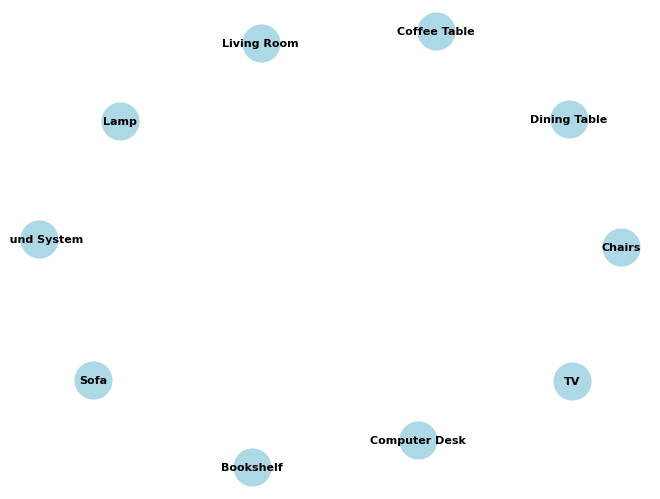

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_room_graph(features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Add edges based on spatial relationships
    for key, value in features.items():
        if isinstance(value, dict) and 'Location' in value:
            location = value['Location']
            if location in features:
                G.add_edge(key, location)

    return G

# Updated sample set of features with more items
sample_features = {
    'Living Room': {'Type': 'Room'},
    'Sofa': {'Type': 'Furniture', 'Location': 'Against the wall'},
    'Coffee Table': {'Type': 'Furniture', 'Location': 'Near the window'},
    'Bookshelf': {'Type': 'Furniture', 'Location': 'In the corner'},
    'TV': {'Type': 'Electronic Device', 'Location': 'On the media console'},
    'Sound System': {'Type': 'Electronic Device', 'Location': 'In the entertainment center'},
    'Dining Table': {'Type': 'Furniture', 'Location': 'Center of the room'},
    'Chairs': {'Type': 'Furniture', 'Location': 'Around the dining table'},
    'Lamp': {'Type': 'Furniture', 'Location': 'Next to the sofa'},
    'Computer Desk': {'Type': 'Furniture', 'Location': 'Against another wall'},
}

# Recreate the room graph with the updated sample features
room_graph = create_room_graph(sample_features)

# Draw and display the updated graph
pos = nx.spring_layout(room_graph)
nx.draw(room_graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue', font_size=8, font_color='black', edge_color='gray')
plt.show()



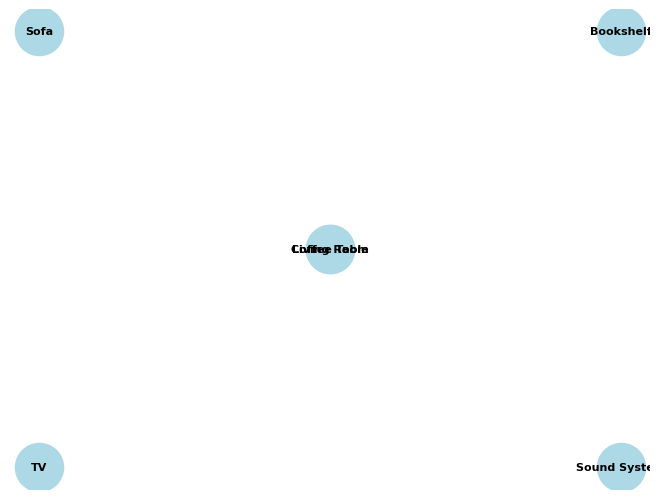

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def create_room_graph(features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Assume connections based on furniture proximity
    for key1, value1 in features.items():
        if isinstance(value1, dict) and 'Location' in value1:
            for key2, value2 in features.items():
                if key1 != key2 and isinstance(value2, dict) and 'Location' in value2:
                    # Connect furniture items located near each other
                    if value1['Location'] == value2['Location']:
                        G.add_edge(key1, key2)

    return G

# Updated sample input with Coffee Table in the middle
sample_features = {
    'Living Room': {'Type': 'Room'},
    'Sofa': {'Type': 'Furniture', 'Location': 'Against the wall'},
    'Coffee Table': {'Type': 'Furniture', 'Location': 'In the middle'},
    'Bookshelf': {'Type': 'Furniture', 'Location': 'In the corner'},
    'TV': {'Type': 'Electronic Device', 'Location': 'On the media console'},
    'Sound System': {'Type': 'Electronic Device', 'Location': 'In the entertainment center'},
}

# Create the room graph with connections based on proximity
room_graph = create_room_graph(sample_features)

# Set the position based on the specified location
pos = {}
for key, value in sample_features.items():
    if isinstance(value, dict) and 'Location' in value:
        location = value['Location']
        if location == 'In the middle':
            pos[key] = (0, 0)
        elif location == 'Against the wall':
            pos[key] = (-1, 1)
        elif location == 'In the corner':
            pos[key] = (1, 1)
        elif location == 'On the media console':
            pos[key] = (-1, -1)
        elif location == 'In the entertainment center':
            pos[key] = (1, -1)

# Add a default position for the 'Living Room'
pos.setdefault('Living Room', (0, 0))

# Draw the graph with red edges, larger node size, and increased figure size
nx.draw(room_graph, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='lightblue', font_size=8, font_color='black', edge_color='red', width=2)

# Display the graph
plt.show()


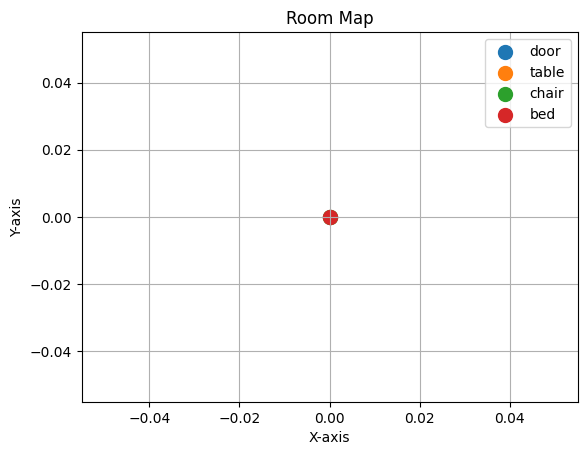

In [ ]:
import spacy
import matplotlib.pyplot as plt

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def extract_objects_and_positions(text):
    doc = nlp(text)

    objects_and_positions = {}
    for token in doc:
        if token.dep_ == "prep":
            # Extract objects and their positions
            objects_and_positions[token.text] = {
                "object": token.head.text,
                "position": token.text
            }

    return objects_and_positions

def generate_room_map(objects_and_positions):
    # Initialize room layout
    room_layout = {
        "door": (0, 0),
        "table": (0, 0),
        "chair": (0, 0),
        "bed": (0, 0)
    }

    # Update positions based on the extracted information
    for prep, info in objects_and_positions.items():
        object_name = info["object"].lower()
        position = info["position"].lower()

        if position == "right":
            room_layout[object_name] = (room_layout[object_name][0] + 1, room_layout[object_name][1])
        elif position == "left":
            room_layout[object_name] = (room_layout[object_name][0] - 1, room_layout[object_name][1])

    # Plotting the room map
    for object_name, position in room_layout.items():
        plt.scatter(position[0], position[1], label=object_name, s=100)

    plt.title("Room Map")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example description
room_description = "There is a table to the right of the door. There is a chair to the left of the table."

# Extract objects and positions
objects_and_positions = extract_objects_and_positions(room_description)

# Generate and display the room map
generate_room_map(objects_and_positions)


Room Name: Kitchen
Dimensions: 12 x 15
kitchen: {'Type': 'stove', 'Location': 'against the wall'}
[Smart Oven]: {'Location': 'on the kitchen counter'}


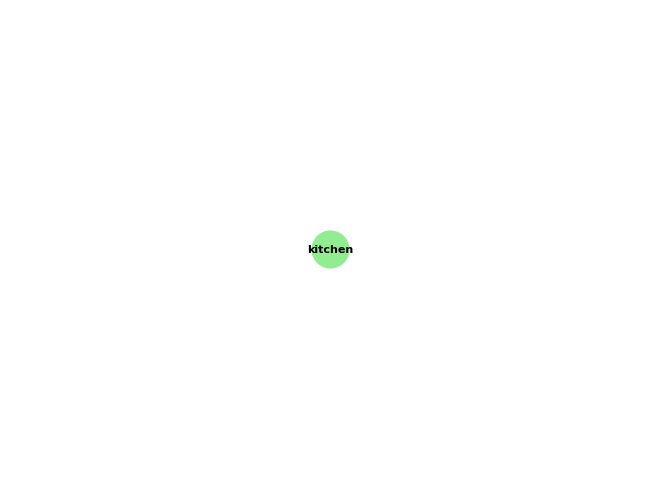

In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt

def extract_kitchen_features(text):
    kitchen_features = {}

    # Basic Information
    room_name_match = re.search(r"Room Name: \[([^\]]+)\]", text)
    dimensions_match = re.search(r"Dimensions: \[([^\]]+)\]", text)

    if room_name_match:
        kitchen_features['Room Name'] = room_name_match.group(1)
    if dimensions_match:
        kitchen_features['Dimensions'] = dimensions_match.group(1)

    # Furniture and Layout
    furniture_matches = re.findall(r"The (.+?) is furnished with a (.+?) placed (.+?)\.", text)
    for furniture_match in furniture_matches:
        kitchen_features[furniture_match[0]] = {'Type': furniture_match[1], 'Location': furniture_match[2]}

    # Accessibility Features
    windows_match = re.search(r"The room has (\d+) windows, providing (natural|artificial) light.", text)
    flooring_match = re.search(r"The flooring is made of \[([^\]]+)\].", text)

    if windows_match:
        kitchen_features['Number of Windows'] = int(windows_match.group(1))
        kitchen_features['Light Source'] = windows_match.group(2)
    if flooring_match:
        kitchen_features['Flooring Material'] = flooring_match.group(1)

    # Technology and Devices
    devices_match = re.findall(r"(\[.+?\]) is located (.+?)\.", text)
    for device_match in devices_match:
        kitchen_features[device_match[0]] = {'Location': device_match[1]}

    # Other Details
    decorative_elements_match = re.search(r"Decorative elements include \[([^\]]+)\].", text)
    color_scheme_match = re.search(r"The color scheme of the room is \[([^\]]+)\].", text)

    if decorative_elements_match:
        kitchen_features['Decorative Elements'] = decorative_elements_match.group(1).split(', ')
    if color_scheme_match:
        kitchen_features['Color Scheme'] = color_scheme_match.group(1).split(', ')

    return kitchen_features

# Sample input for the kitchen
kitchen_sample_input = """
Basic Information:
Room Name: [Kitchen]
Dimensions: [12 x 15]

Furniture and Layout:
The kitchen is furnished with a stove placed against the wall.
There is a refrigerator near the entrance.
A table is located in the center.

Accessibility Features:
The room has 1 window, providing natural light.
The flooring is made of tiles.

Technology and Devices:
[Smart Oven] is located on the kitchen counter.
[Refrigerator] is placed near the entrance.

Other Details:
Decorative elements include a fruit bowl and kitchen plants.
The color scheme of the room is white and stainless steel.
"""

# Extract features from the kitchen sample input
kitchen_features = extract_kitchen_features(kitchen_sample_input)

# Print the extracted features for the kitchen
for key, value in kitchen_features.items():
    print(f"{key}: {value}")

def create_kitchen_graph(kitchen_features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in kitchen_features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Add edges based on spatial relationships
    for key, value in kitchen_features.items():
        if isinstance(value, dict) and 'Location' in value:
            location = value['Location']
            if location in kitchen_features:
                G.add_edge(key, location)

    return G

# Recreate the kitchen graph with the updated sample features
kitchen_graph = create_kitchen_graph(kitchen_features)

# Draw and display the updated kitchen graph
pos = nx.spring_layout(kitchen_graph)
nx.draw(kitchen_graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightgreen', font_size=8, font_color='black', edge_color='gray')
plt.show()


In [2]:
import spacy

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Initialize variables to store user inputs
kitchen_description = input("1. Please describe your kitchen (e.g., size, layout, features): ")
stove_location_description = input("2. Where is the stove positioned in the kitchen? ")
fridge_location_description = input("3. Can you describe where the fridge is located in the kitchen? ")
sink_location_description = input("4. Where is the sink positioned in the kitchen? ")
number_of_counters = input("5. How many counters are there in your kitchen? ")
counters_location_description = input("6. Can you describe where the counters are located in the kitchen? ")
number_of_chairs = input("7. How many chairs or stools are there in your kitchen? ")
chairs_location_description = input("8. Can you describe where the chairs or stools are located in the kitchen? ")

# Combine all descriptions into one text
full_description = f"{kitchen_description} {stove_location_description} {fridge_location_description} {sink_location_description} {counters_location_description} {chairs_location_description}"

# Process the full description using spaCy
doc = nlp(full_description)

# Initialize a list to store extracted locations
extracted_locations = []

# Extract locations mentioned in the text
for entity in doc.ents:
    if entity.label_ == "LOC" or entity.label_ == "GPE":
        extracted_locations.append(entity.text)

# Print the extracted locations
if extracted_locations:
    print("\nExtracted locations mentioned in the description:")
    for location in extracted_locations:
        print(location)
else:
    print("\nNo specific locations mentioned in the description.")


1. Please describe your kitchen (e.g., size, layout, features):  10 x 10
2. Where is the stove positioned in the kitchen? middle
3. Can you describe where the fridge is located in the kitchen? right corner
4. Where is the sink positioned in the kitchen? left corner
5. How many counters are there in your kitchen? 2
6. Can you describe where the counters are located in the kitchen? next to the door
7. How many chairs or stools are there in your kitchen? 4
8. Can you describe where the chairs or stools are located in the kitchen? near the counter

No specific locations mentioned in the description.


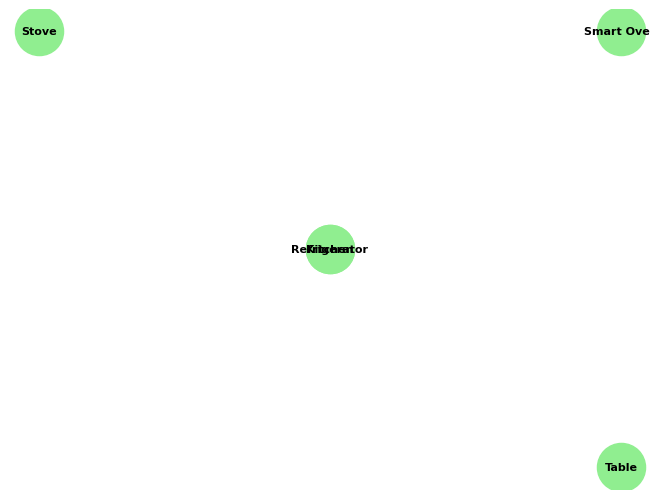

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def create_kitchen_graph(kitchen_features):
    G = nx.Graph()

    # Add nodes for furniture and devices
    for key, value in kitchen_features.items():
        if isinstance(value, dict) and 'Type' in value:
            G.add_node(key, type=value['Type'])

    # Assume connections based on furniture proximity
    for key1, value1 in kitchen_features.items():
        if isinstance(value1, dict) and 'Location' in value1:
            for key2, value2 in kitchen_features.items():
                if key1 != key2 and isinstance(value2, dict) and 'Location' in value2:
                    # Connect furniture items located near each other
                    if value1['Location'] == value2['Location']:
                        G.add_edge(key1, key2)

    return G

# Updated sample input for the kitchen with Table in the center
kitchen_sample_features = {
    'Kitchen': {'Type': 'Room'},
    'Stove': {'Type': 'Furniture', 'Location': 'Against the wall'},
    'Refrigerator': {'Type': 'Furniture', 'Location': 'Near the entrance'},
    'Table': {'Type': 'Furniture', 'Location': 'In the center'},
    'Smart Oven': {'Type': 'Electronic Device', 'Location': 'On the kitchen counter'},
}

# Create the kitchen graph with connections based on proximity
kitchen_graph = create_kitchen_graph(kitchen_sample_features)

# Set the position based on the specified location
pos = {}
for key, value in kitchen_sample_features.items():
    if isinstance(value, dict) and 'Location' in value:
        location = value['Location']
        if location == 'Against the wall':
            pos[key] = (-1, 1)
        elif location == 'Near the entrance':
            pos[key] = (0, 0)
        elif location == 'In the center':
            pos[key] = (1, -1)
        elif location == 'On the kitchen counter':
            pos[key] = (1, 1)

# Add a default position for the 'Kitchen'
pos.setdefault('Kitchen', (0, 0))

# Draw the graph with red edges, larger node size, and increased figure size
nx.draw(kitchen_graph, pos, with_labels=True, font_weight='bold', node_size=1200, node_color='lightgreen', font_size=8, font_color='black', edge_color='red', width=2)

# Display the graph
plt.show()
